# Preparation

## Import libraries and packages

In [397]:
# Import Libraries and Packages

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import os 
from os.path import join

import warnings   # Ignore unneccessary warning messages
warnings.filterwarnings('ignore')

먼저 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오겠습니다. 전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있습니다. 데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠습니다.

## Load data

### Make data paths

In [398]:
abalone_path = join('.', 'abalone.txt')
column_path = join('.', 'abalone_attributes.txt')  # Load names of columns

### Load 'Alabone_attributes.txt' to make column headers

In [399]:
abalone_columns = list()      # Make a list for names of columns
for l in open(column_path):   # Open the file 'abalone_attributes.txt'
  abalone_columns.append(l.strip())   # add 'l' to the list by line
                                      # append(l.strip()) -> strip(): cleaning a result  e.g. \n, space
print(abalone_columns)        # Check whether a list is made well

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


### Load 'Abalone.txt' data

In [400]:
#data = pd.read_csv(abalone_path)  # Issue: The first column is recognized as a 'header' -> Solve: Header=none
data = pd.read_csv(abalone_path, header=None) 
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Add Column Headers to Abalone dataset

In [401]:
data = pd.read_csv(abalone_path,
                   header=None,
                   names = abalone_columns)   # Set 'abalone_columns' as a table header
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Look Up Data 

In [402]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [403]:
data.shape   # -> Results: (the number of rows, the number of numbers)

(4177, 9)

In [404]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Seperate Label Data('Sex') and Feature Data

### Delete Label Data 

In [406]:
label = data['Sex']  # Get 'Sex' column as a label
del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Scaling

## Min-Max Scaling (Min-Max Normalization)

It consists of rescaling the range of features to scale the range in [0, 1].

In [407]:
data2 = (data - np.min(data)) / (np.max(data) - np.min(data))  # Not recommended -> use libraries
data2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


### 1) Load Data-Processing Module 

In [408]:
# Fit and Transform Data seperately
from  sklearn.preprocessing import MinMaxScaler

### 2) Min-Max Transform

#### 1. Fit -> Transform (2 steps)

In [409]:
mMscaler = MinMaxScaler()
mMscaler.fit(data)  # Fit data 
data3 = mMscaler.transform(data) # Transform from normal data to Min-Max data

#data3.head()  # Issue: error msg is {'numpy.ndarray' object has no attribute 'head'} -> 'Panda's data type
              # Solution: Change the type from Numpy's NdArray to Panda's DataFrame
type(data3)  

numpy.ndarray

#### Fit + Transform (1 step)

In [410]:
# Fit and Transform Data

mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)  # 'fit + transform' in a single step

type(data4)

numpy.ndarray

In [411]:
# Change type from Numpy's NdArray to Panda's DataFrame

mMscaled_data = pd.DataFrame(data4, columns=data.columns)  # Load a list of columns -> Change to DataFrame
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


## Standard Scaling

### 1) Load Data-Processing Module 

In [412]:
from sklearn.preprocessing import StandardScaler

### 2) Standard Scaling

In [413]:
sdscaler = StandardScaler()   # Instance
sdscaled_data = sdscaler.fit_transform(data)

In [414]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


# Sampling

- Oversampling: for small datasets, increasing random data
- Undersampling: for large datasets, picking random data to reduce size of dataset

## Random Over/Under Sampling

### Load Modules

In [415]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Load to memory

In [416]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

### Random Over Sampling

In [417]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)   # fit_resample(featureData,labelData)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

oversampled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [418]:
# Check current size of dataset
data.shape

(4177, 8)

In [419]:
# Check the result

# 1. Check a ratio of the original dataset
print('Class ratio of Origianl Dataset: \n{0}'.format(pd.get_dummies(label).sum()))
# 'label': from the original dataset 
# get_dummies().sum(): get dummies to sum

# Result: 'M' is the largest group -> the number of 'F' and 'I' will be increasing to '1528'('M')

# ---------------------------------
# 2. Check the result of oversampling
print('\n The result of oversamling: \n{0}'.format(pd.get_dummies(oversampled_label).sum()))

Class ratio of Origianl Dataset: 
F    1307
I    1342
M    1528
dtype: int64

 The result of oversamling: 
F    1528
I    1528
M    1528
dtype: int64


In [420]:
pd.get_dummies(label.head())

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


### Random Under Sampling

In [421]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

In [422]:
# Check current size of dataset
data.shape

(4177, 8)

In [423]:
# Check the result

# 1. Check a ration of the original dataset
print('The original Dataset: \n{0}'.format(pd.get_dummies(label).sum()))
print('\nThe result of Undersampling: \n{0}'.format(pd.get_dummies(undersampled_label).sum()))

The original Dataset: 
F    1307
I    1342
M    1528
dtype: int64

The result of Undersampling: 
F    1307
I    1307
M    1307
dtype: int64


## SMOTE (Synthetic Minority Over-sampling Technique)

### Load Modules

In [424]:
from imblearn.over_sampling import SMOTE

### Make a sample dataset using 'sklearn' library

In [425]:
from sklearn.datasets import make_classification  

data, label = make_classification(n_samples=1000,   # the number of sample data
                                  n_features=2,     # the number of features
                                  n_informative=2, 
                                  n_redundant=0,
                                  n_repeated=0,
                                  n_classes=3,      # the number of classes
                                  n_clusters_per_class=1,
                                  weights=[0.05, 0.15, 0.8],  # ratio of 3 classes
                                  class_sep=0.8,
                                  random_state=2019)

label

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,

In [426]:
data

array([[-0.38148542, -0.25661671],
       [-0.4083119 ,  0.09191871],
       [ 0.68144629, -0.67466142],
       ...,
       [ 0.36566061, -0.52399384],
       [-1.78159071,  1.92432382],
       [ 0.73685928, -0.85311514]])

### Visualization for Original Dataset

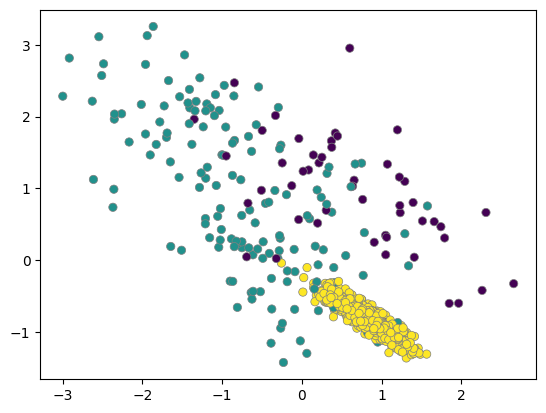

In [427]:
# Make a board
fig = plt.Figure(figsize=(12,6))

# Scatter Plot
plt.scatter(data[:,0],  # x = the first column -> '[:]' the whole rows, '0': the first column
            data[:,1],  # y = the second column
            c=label,    # color by label
            linewidth=0.5,       # edge line width
            edgecolor='grey') # edge line color


### SMOTE

In [428]:
# Set neighbors for SMOTE
smote = SMOTE(k_neighbors=5)  # the number of neighbors is 5 

In [429]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [430]:
# Comparison

print('Original Dataset: \n{0}'.format(pd.get_dummies(label).sum()))
print('\nSmoted Dataset: \n{0}'.format(pd.get_dummies(smoted_label).sum()))

Original Dataset: 
0     53
1    154
2    793
dtype: int64

Smoted Dataset: 
0    793
1    793
2    793
dtype: int64


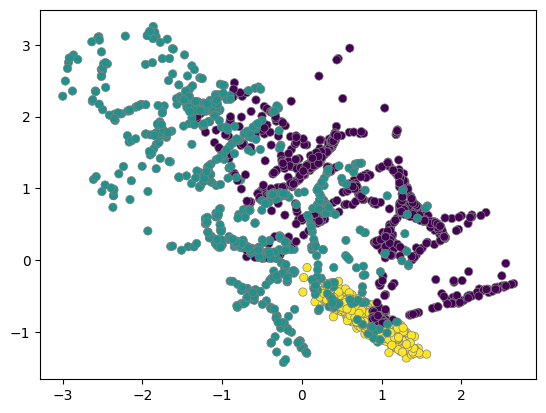

In [431]:
# Visualization

fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0],   # X-axis 
            smoted_data[:,1],   # Y-axis
            c=smoted_label,
            linewidth=0.5,
            edgecolor='grey')

# Dimensionality Reduction (=Curse of Dimensionality)

In [432]:
# Curse of Dimensionality

# Reason of Curse of Dimensionality
# To reduce density to increase efficiency of learning data

## Load Modules

In [433]:
from sklearn.datasets import load_digits

digits = load_digits()

In [434]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Get Data

In [435]:
# Get Data
data = digits.data
label = digits.target

print(data[0])   # Result: Result shows in 64 dimention
print('\n',label[0])


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

 0


In [436]:
# Reshape the data to 8*8
#print(data[0].reshape((8,8)))  # -> reason of using (()): datatype is tuple
print(data[0].reshape((8,-1)))  # ((8,-1))=((8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Label: 0


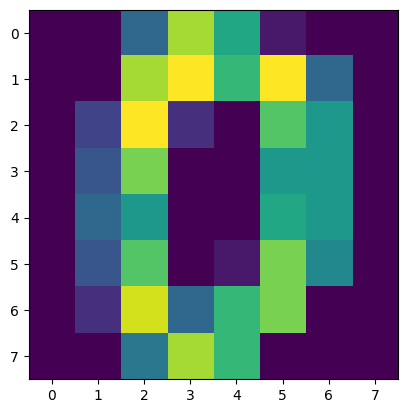

In [437]:
# Visualization
plt.imshow(data[0].reshape((8,8)))
print('Label: {}'.format(label[0]))

## Dimensionality reduction: PCA (Principal Component Analysis)

### Load Modules

In [438]:
from sklearn.decomposition import PCA

In [439]:
pca = PCA(n_components=2)

### Find Principal Components

In [440]:
new_data = pca.fit_transform(data)
new_data

array([[ -1.25946634,  21.27488396],
       [  7.95761214, -20.76870072],
       [  6.99192228,  -9.95598525],
       ...,
       [ 10.80128356,  -6.96025418],
       [ -4.87209944,  12.42395511],
       [ -0.34439046,   6.36554918]])

### Check Results

In [441]:
# Check result
print('The dimentionality of Original dataset: \n{}'.format(data.shape))
print('\nThe dimentionality of PCA dataset: \n{}'.format(new_data.shape))

The dimentionality of Original dataset: 
(1797, 64)

The dimentionality of PCA dataset: 
(1797, 2)


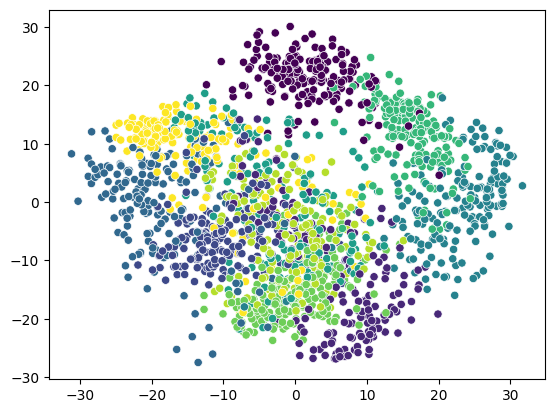

In [442]:
# Visualization

plt.scatter(new_data[:,0],
            new_data[:,1],
            c=label,
            linewidth=0.5,
            edgecolor='white')

# Categorical Variable to Numeric Variable 

## Label Encoding

### Load Dataset

In [443]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']
del data

### Import Module

In [444]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

### Label Encoding

In [445]:
encoded_label = labelEncode.fit_transform(label)   # Tansform from 'F, M, I' to '0,1,2'
encoded_label

array([2, 2, 0, ..., 2, 0, 2])

## One-hot Encoding

### Load Modules

In [446]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

### Look UP Data

In [447]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [448]:
label.values

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

### Reshape Data and Transform

In [449]:
label.values.reshape((-1, 1))  # One data in a column

array([['M'],
       ['M'],
       ['F'],
       ...,
       ['M'],
       ['F'],
       ['M']], dtype=object)

In [450]:
label.values.reshape((1,-1))  # ? data in a row

array([['M', 'M', 'F', ..., 'M', 'F', 'M']], dtype=object)

### One-Hot Encoding

In [451]:
#one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

ohe.fit(label.values.reshape((-1, 1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))

one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [452]:
columns = np.concatenate([np.array(['label']),   # Make columns containing a column 'label' -> empty value
                          ohe.categories_[0]])   # Add a list of categories to columns

columns

array(['label', 'F', 'I', 'M'], dtype=object)

In [453]:
print(columns)

['label' 'F' 'I' 'M']


In [454]:
ohe.categories_[0]

array(['F', 'I', 'M'], dtype=object)

In [455]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1,3))],
                                            axis=1,),
                      columns=columns)

result.head(10)

,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0
